In [1]:
from Preprocessing.data_clean import remove_221_rows, dropping_no_betting_data, josh_features, fill_f_pm_01m, class_or_rating_average, oli_features
from Preprocessing.V2.v2_preprocessor_js import preprocess_features_v2
import pandas as pd

data  = pd.read_csv("../../../raw_data/raw_data_v2.2.csv")

data_cleaned = remove_221_rows(data)
data_cleaned = dropping_no_betting_data(data_cleaned)
data_cleaned = josh_features(data_cleaned)
data_cleaned = class_or_rating_average(data_cleaned)
data_cleaned = oli_features(data_cleaned)
data_cleaned = fill_f_pm_01m(data_cleaned)



preprocessed_data = preprocess_features_v2(data_cleaned)

preprocessed_data.to_csv("../../../raw_data/data_cleaned_and_preprocessed.csv", index=False)

data = pd.read_csv("../../../raw_data/data_cleaned_and_preprocessed.csv")
data.sort_values(by='f_ko')
data = data.reset_index(drop=True)

/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_54956/2614772956.py:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data  = pd.read_csv("../../../raw_data/raw_data_v2.2.csv")


first 221 rows removed. New shape = (118354, 116)


/Users/joshstone/code/lucasglanville/and_theyre_off_backend/Preprocessing/data_clean.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_impute] = data[columns_to_impute].apply(impute_row, axis=1)


Cleaned up missing odds. New shape = (118093, 116)
Added Josh features. New shape = (118093, 123)
Added Oli features 2/4. New shape = (118093, 125)
Added Oli features 4/4. New shape = (118093, 127)
number of columns:  128
✅ DROPPED IRRELEVANT COLUMNS
✅ DROPPED ROWS WITH NULL VALUES
✅ WHITESPACE STRIPPED FROM 'f_track'
✅ WINNERS CODED AS '1', REST '0'
✅ 'f_ko' CONVERTED TO DATETIME
✅ TRACK CONDITIONS ORDINALLY ENCODED
✅ NUMERIC FEATURES MINMAX-SCALED
✅ IMPUTED 'no_headgear' for NULLS IN 'f_headgear'
✅ IMPUTED MEAN FOR NULLS IN 'f_dob' & 'f_prb_avg'
✅ IMPUTED '0' FOR NULLS IN 68 x FEATURES
✅ CAT. FEATURES OH-ENCODED (Track, Headgear, Country)
number of columns:  90
✅ COLUMN TRANSFORMER ASSEMBLED
⏳ FIT_TRANSFORMING THE PREPROCESSING PIPE...
number of columns:  166
✅ DATA PROCESSED WITH SHAPE: (117468, 166)


In [2]:
data = data[(data['f_pm_05m'] <= 50)]

In [3]:
data = data.reset_index(drop=True)

In [4]:
data.head(2)

,f_going,average_or_rating_class,above_below_official_rating_class,PreviousPosition,PredictedRank,f_distance,f_class,f_age,f_pace,f_weight,...,f_id,f_ko,f_horse,pred_isp,f_place,f_pm_15m,f_pm_05m,f_pm_01m,f_pm_01m_p_back,linear_target
0,0.4,0.836105,0.643877,0.0,0.000000,0.0,0.166667,0.25,0.7,0.21875,...,16149939000030,2021-03-06 01:25:00,Tone The Barone,2.5,0,1.9,1.81,2.28,-1.0,-1.0
1,0.4,0.836105,0.691321,0.0,0.032258,0.0,0.166667,0.50,0.5,0.34375,...,16149939000030,2021-03-06 01:25:00,Blue De Vega,4.5,0,8.2,9.80,10.00,-1.0,-1.0


In [5]:
backtest = data[['f_ko','f_id', 'id','f_horse','f_pm_01m', 'linear_target', 'f_place']]




data['pred_isp_prob'] = 1 / data['pred_isp']
data['linear_target_prob'] = 1 / data['linear_target']

In [6]:
data.head(2)

,f_going,average_or_rating_class,above_below_official_rating_class,PreviousPosition,PredictedRank,f_distance,f_class,f_age,f_pace,f_weight,...,f_horse,pred_isp,f_place,f_pm_15m,f_pm_05m,f_pm_01m,f_pm_01m_p_back,linear_target,pred_isp_prob,linear_target_prob
0,0.4,0.836105,0.643877,0.0,0.000000,0.0,0.166667,0.25,0.7,0.21875,...,Tone The Barone,2.5,0,1.9,1.81,2.28,-1.0,-1.0,0.400000,-1.0
1,0.4,0.836105,0.691321,0.0,0.032258,0.0,0.166667,0.50,0.5,0.34375,...,Blue De Vega,4.5,0,8.2,9.80,10.00,-1.0,-1.0,0.222222,-1.0


In [7]:

X = data[['stall_position', 
          'iv_trainer_l16r', 'iv_jockey_l16r',
          'ae_trainer_l16r' ,'ae_jockey_l16r', 'pred_isp_prob', 'f_runners']]

# X = data[['f_runners','or_rating_vs_avg_race', 'stall_position', 
#           'iv_horse_at', 'iv_trainer_l200r', 'iv_trainer_l50r', 'iv_trainer_l16r', 'iv_trainer_at',
#           'iv_jockey_l200r', 'iv_jockey_l50r', 'iv_jockey_l16r', 'iv_jockey_at',
#           'ae_horse_l10r', 'ae_horse_l5r' , 'ae_horse_l2r' ,'ae_horse_at',
#           'ae_trainer_l200r' , 'ae_trainer_l50r' , 'ae_trainer_l16r' , 'ae_trainer_at',
#           'ae_jockey_l200r' , 'ae_jockey_l50r', 'ae_jockey_l16r' , 'ae_jockey_at' , 'pred_isp']]

#'f_dob', 'f_prb_avg',





y = data[["f_place","pred_isp"]] #OR 'linear_target'

print(data.shape)
print(X.shape)
print(y.shape)
print(backtest.shape)

#Train = Year 1
#Val = Year 2
#Test = Year 3 (6 months)

print(X.head(2))
print(y.head(2))

(104368, 168)
(104368, 7)
(104368, 2)
(104368, 7)
   stall_position  iv_trainer_l16r  iv_jockey_l16r  ae_trainer_l16r  \
0        0.148019              0.0             0.5              0.0   
1        0.480479              0.0             0.0              0.0   

   ae_jockey_l16r  pred_isp_prob  f_runners  
0        0.014276       0.400000    0.15625  
1        0.000000       0.222222    0.15625  
   f_place  pred_isp
0        0       2.5
1        0       4.5


In [9]:
X_train = X.iloc[:40000]
X_val = X.iloc[40000:70000]
X_test = X.iloc[70000:]
y_train = y.iloc[:40000]
y_val = y.iloc[40000:70000]
y_test = y.iloc[70000:]
backtest_train = backtest.iloc[:40000]
backtest_val = backtest.iloc[40000:70000]
backtest_test = backtest.iloc[70000:]

In [ ]:
X_val.shape

In [11]:
backtest_test

,f_ko,f_id,id,f_horse,f_pm_01m,linear_target,f_place
70000,2022-10-07 17:45:00,16651611000006,16651611000009,Agilulf,32.0,-1.0,0
70001,2022-10-07 18:00:00,16651620000004,16651620000144,Eglish,10.5,-1.0,0
70002,2022-10-07 18:00:00,16651620000004,16651620000422,Skontonovski,6.2,-1.0,0
70003,2022-10-07 18:00:00,16651620000004,16651620000418,Sister Lola,7.0,-1.0,0
70004,2022-10-07 18:00:00,16651620000004,16651620000300,Muhalhel,21.0,-1.0,0
...,...,...,...,...,...,...,...
104363,2023-08-20 18:45:00,16925535000012,16925535000107,Dark Island,6.8,-1.0,0
104364,2023-08-20 18:45:00,16925535000012,16925535000404,Traila,13.0,11.4,1
104365,2023-08-20 18:45:00,16925535000012,16925535000015,Alpine Stroll,10.5,-1.0,0
104366,2023-08-20 18:45:00,16925535000012,16925535000353,Saratoga Gold,17.5,-1.0,0


In [ ]:
#X_test.to_csv("NN1_X_test.csv", index = False)

In [ ]:
#y_test.to_csv("NN1_y_test.csv", index = False)

In [ ]:
#backtest_test.to_csv("NN1_backtest_test.csv", index = False)

In [ ]:
#backtest_test.to_csv("NN1_backtest_test.csv")

In [ ]:
#buggy data = 2532754    2021-06-20 03:55:00
                #29406    20-06-14 18:45:00

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
y_test.head()

In [ ]:
y_test.shape

In [ ]:
#X_test.to_csv("NN2_X_test_7.csv", index = False)

In [ ]:
#y_test.to_csv("NN2_y_test_7.csv", index = False)

In [ ]:
#backtest_test.to_csv("NN2_backtest_test_7.csv", index = False)

In [ ]:
# def odds_loss(y_true, y_pred):
#     """
#     The function implements the custom loss function
    
#     Inputs
#     true : a vector of dimension batch_size, 7. A label encoded version of the output and the backp1_a and backp1_b
#     pred : a vector of probabilities of dimension batch_size , 5.
    
#     Returns 
#     the loss value
#     """
#     win_home_team = y_true[:, 0:1]
#     win_home_or_draw = y_true[:, 1:2]
#     win_away = y_true[:, 2:3]
#     win_away_or_draw = y_true[:, 3:4]
#     draw = y_true[:, 4:5]
#     no_bet = y_true[:, 5:6]
#     odds_a = y_true[:, 6:7]
#     odds_b = y_true[:, 7:8]
#     gain_loss_vector = K.concatenate([win_home_team * (odds_a - 1) + (1 - win_home_team) * -1,
#       win_home_or_draw * (1/(1 -1/odds_b) - 1) + (1 - win_home_or_draw) * -1,
#       win_away * (odds_b - 1) + (1 - win_away) * -1,
#       win_away_or_draw * (1/(1 -1/odds_a) - 1) + (1 - win_away_or_draw) * -1,
#       draw * (1/(1 - 1/odds_a - 1/odds_b) - 1) + (1 - draw) * -1,
#       K.zeros_like(odds_a)], axis=1)
#     return -1 * K.mean(K.sum(gain_loss_vector * y_pred, axis=1))

In [ ]:
# def get_data():
#     data = pd.read_csv('extract-betsentiment-com.csv')
#     X = data.values[:, 5:-5]
#     y = data.values[:, -1]
#     y_full = np.zeros((X.shape[0], 8))
#     for i, y_i in enumerate(y):
#         if y_i == 1:
#             y_full[i, 0] = 1.0
#             y_full[i, 1] = 1.0
#         if y_i == 2:
#             y_full[i, 2] = 1.0
#             y_full[i, 3] = 1.0
#         if y_i == 3:
#             y_full[i, 1] = 1.0
#             y_full[i, 3] = 1.0
#             y_full[i, 4] = 1.0
#         y_full[i, 6] = X[i, 1] # ADD ODDS OF HOME TEAM
#         y_full[i, 7] = X[i, 2] # ADD ODDS OF AWAY TEAM
#     return X, y_full, y
# X, y, outcome = get_data()
# # SPLIT THE DATA IN TRAIN AND TEST DATASET.
# train_x, test_x, train_y, test_y, = train_test_split(X,  y)

In [ ]:
from keras.utils import get_custom_objects
import tensorflow as tf
from keras import backend as K


def custom_loss_function(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)  # Convert y_true to float32
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    
    win_horse = y_true[:, 0:1]
    win_odds = y_true[:, 1:2]
    gain_loss_vector = K.concatenate([win_horse * (win_odds - 1) + (1 - win_horse) * -1,
    K.zeros_like(win_odds)], axis=1)
    return -0.1 * K.mean(K.sum(gain_loss_vector * y_pred, axis=1))
    #return -1 * tf.reduce_mean(tf.reduce_sum(gain_loss_vector * y_pred, axis=1))

get_custom_objects().update({"custom_loss_function": custom_loss_function})

In [12]:
# convert labels to a one-hot vector
# from tensorflow.keras.utils import to_categorical

# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

# define network architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Precision, Accuracy, Recall, F1Score
from tensorflow.keras.losses import Poisson
from tensorflow.keras.optimizers import Adam

MLP2 = Sequential()
MLP2.add(InputLayer(input_shape=(7, ))) # input layer
MLP2.add(Dense(32, activation='relu')) # hidden layer 1
MLP2.add(Dense(2, activation='softmax')) # output layer


In [14]:
MLP2.load_weights("../../../Models/weights-JStone2609/custom_scorer0.05_7input_l16_05mfilter_01mplace")

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import InputLayer
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.metrics import Precision, Accuracy, Recall, F1Score
# from tensorflow.keras.losses import Poisson
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import Input
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras import Model
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# def get_model(input_dim, output_dim, base=1000, multiplier=0.25, p=0.2):
#     inputs = Input(shape=(input_dim,))
#     l = BatchNormalization()(inputs)
#     l = Dropout(p)(l)
#     n = base
#     l = Dense(n, activation='relu')(l)
#     l = BatchNormalization()(l)
#     l = Dropout(p)(l)
#     n = int(n * multiplier)
#     l = Dense(n, activation='relu')(l)
#     l = BatchNormalization()(l)
#     l = Dropout(p)(l)
#     n = int(n * multiplier)
#     l = Dense(n, activation='relu')(l)
#     outputs = Dense(output_dim, activation='softmax')(l)
#     model = Model(inputs=inputs, outputs=outputs)
#     model.compile(optimizer='Nadam', loss=custom_loss_function)
#     return model
# model = get_model(7, 2, 1000, 0.5, 0.2)
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
#           epochs=200, batch_size=5, callbacks=[EarlyStopping(patience=2),ModelCheckpoint('odds_loss.hdf5',save_best_only=True)])

In [ ]:
# optimization
MLP2.compile(loss='custom_loss_function',
            optimizer=Adam(learning_rate = 0.0005))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# train (fit)

es = EarlyStopping(patience=5, restore_best_weights=True)

history = MLP2.fit(X_train, y_train, 
                  epochs=200, batch_size=32, verbose=1,
                  validation_data=(X_val, y_val), callbacks = [es], shuffle = True)

In [15]:
# evaluate performance on test data
a = MLP2.evaluate(X_test, y_test,
                                         verbose=1)
a

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [16]:
y_pred = MLP2.predict(X_test)

1074/1074 [==============================] - 0s 180us/step


In [17]:
y_pred

array([[8.6140849e-02, 9.1385913e-01],
       [1.6554300e-11, 1.0000000e+00],
       [7.0244687e-12, 1.0000000e+00],
       ...,
       [1.3752471e-03, 9.9862480e-01],
       [2.7563639e-02, 9.7243643e-01],
       [4.8739584e-03, 9.9512607e-01]], dtype=float32)

In [18]:
y_pred[:, 0]

array([8.6140849e-02, 1.6554300e-11, 7.0244687e-12, ..., 1.3752471e-03,
       2.7563639e-02, 4.8739584e-03], dtype=float32)

<Axes: ylabel='Count'>

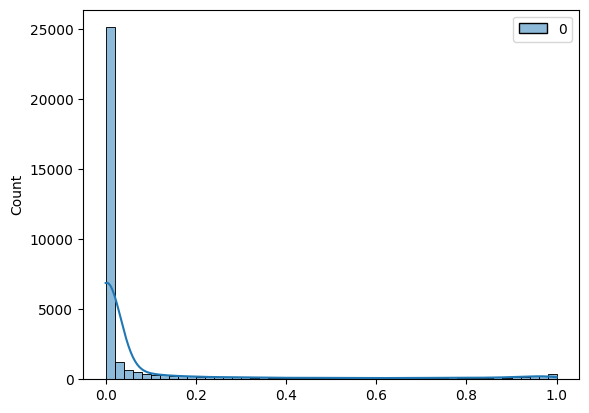

In [19]:
import seaborn as sns
sns.histplot(y_pred[:, 0:1], bins = 50, kde=True)

In [20]:
backtest_test['model_preds'] = y_pred[:, 0:1]
backtest_test['odds_preds'] = 1/ backtest_test['f_pm_01m']
backtest_test['model_edge_basic'] = backtest_test['model_preds'] - backtest_test['odds_preds']
backtest_test['model_edge_proportionate'] = backtest_test['model_preds'] / backtest_test['odds_preds']

/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_54956/3707614411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_test['model_preds'] = y_pred[:, 0:1]
/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_54956/3707614411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_test['odds_preds'] = 1/ backtest_test['f_pm_01m']
/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_54956/3707614411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [21]:
#backtest_test = backtest_test.drop(columns=['f_ko'])
model_preds_race = backtest_test.groupby('f_id').sum().reset_index()
model_preds_race2 = model_preds_race[['f_id', 'model_preds', 'odds_preds']]
dict_odds_preds = model_preds_race2.set_index('f_id')['odds_preds'].to_dict()
dict_race_preds = model_preds_race2.set_index('f_id')['model_preds'].to_dict()
backtest_test['race_model_preds'] = backtest_test['f_id'].map(dict_race_preds)
backtest_test['race_odds_preds'] = backtest_test['f_id'].map(dict_odds_preds)
backtest_test['model_preds_scaled'] = (backtest_test['model_preds'] / backtest_test['race_model_preds']) * backtest_test['race_odds_preds']
backtest_test['model_edge_basic_scaled'] = backtest_test['model_preds_scaled'] - backtest_test['odds_preds']
backtest_test['model_edge_prop_scaled'] = backtest_test['model_preds_scaled'] / backtest_test['odds_preds']

/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_54956/502887811.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_test['race_model_preds'] = backtest_test['f_id'].map(dict_race_preds)
/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_54956/502887811.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_test['race_odds_preds'] = backtest_test['f_id'].map(dict_odds_preds)
/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_54956/502887811.py:8: SettingWithCopyWarni

In [22]:
backtest_test['model_preds'] = round(backtest_test['model_preds'],2)

/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_54956/2474238632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_test['model_preds'] = round(backtest_test['model_preds'],2)


In [23]:
backtest_test.head(2)

,f_ko,f_id,id,f_horse,f_pm_01m,linear_target,f_place,model_preds,odds_preds,model_edge_basic,model_edge_proportionate,race_model_preds,race_odds_preds,model_preds_scaled,model_edge_basic_scaled,model_edge_prop_scaled
70000,2022-10-07 17:45:00,16651611000006,16651611000009,Agilulf,32.0,-1.0,0,0.09,0.031250,0.054891,2.756507e+00,0.086141,0.031250,3.125000e-02,0.000000,1.000000e+00
70001,2022-10-07 18:00:00,16651620000004,16651620000144,Eglish,10.5,-1.0,0,0.00,0.095238,-0.095238,1.738201e-10,4.834243,1.001092,3.428124e-12,-0.095238,3.599530e-11


/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_54956/957651885.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfall['cumulative_profit'] = dfall['linear_target'].cumsum()
/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_54956/957651885.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['cumulative_profit'] = df5['linear_target'].cumsum()
/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_54956/957651885.py:23: SettingWithCopyWarning: 
A value is trying to be set on 

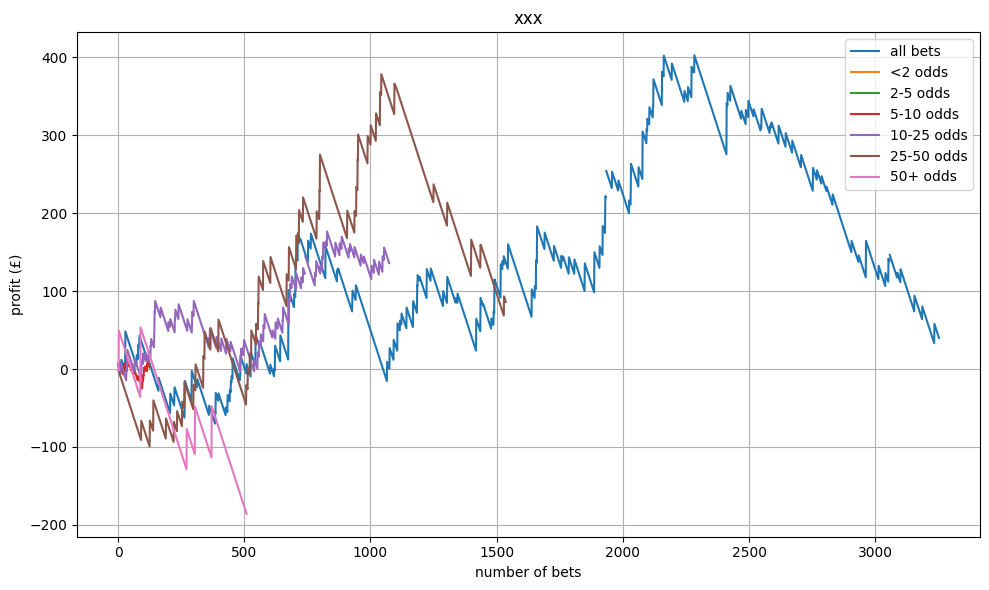

In [34]:
# Create dataframes of horses above specific proba_difference thresholds

all_bets = backtest_test[backtest_test['model_preds'] >= 0.5]
above0 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['f_pm_01m'] < 2)]
above5 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['f_pm_01m'] >= 2) & (backtest_test['f_pm_01m'] < 5)]
above10 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['f_pm_01m'] >= 5) & (backtest_test['f_pm_01m'] < 10)]
above15 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['f_pm_01m'] >= 10) & (backtest_test['f_pm_01m'] < 25)]
above20 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['f_pm_01m'] >= 25) & (backtest_test['f_pm_01m'] < 51)]
above30 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['f_pm_01m'] >= 52)]

# Calculate evolutions of profits for each threshold

dfall = all_bets
dfall['cumulative_profit'] = dfall['linear_target'].cumsum()

df0 = above0
df0['cumulative_profit'] = df0['linear_target'].cumsum()

df5 = above5
df5['cumulative_profit'] = df5['linear_target'].cumsum()

df10 = above10
df10['cumulative_profit'] = df10['linear_target'].cumsum()

df15 = above15
df15['cumulative_profit'] = df15['linear_target'].cumsum()

df20 = above20
df20['cumulative_profit'] = df20['linear_target'].cumsum()

df30 = above30
df30['cumulative_profit'] = df30['linear_target'].cumsum()

import matplotlib.pyplot as plt
# Plot
plt.figure(figsize=(10,6))
plt.plot(range(1, len(dfall) + 1), dfall['cumulative_profit'], label='all bets')
plt.plot(range(1, len(df0) + 1), df0['cumulative_profit'], label='<2 odds')
plt.plot(range(1, len(df5) + 1), df5['cumulative_profit'], label='2-5 odds')
plt.plot(range(1, len(df10) + 1), df10['cumulative_profit'], label='5-10 odds')
plt.plot(range(1, len(df15) + 1), df15['cumulative_profit'], label='10-25 odds')
plt.plot(range(1, len(df20) + 1), df20['cumulative_profit'], label='25-50 odds')
plt.plot(range(1, len(df30) + 1), df30['cumulative_profit'], label='50+ odds')

plt.title("xxx")
plt.xlabel("number of bets")
plt.ylabel("profit (£)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history["val_loss"])
plt.show()

In [26]:
bets_50 = backtest_test[backtest_test['model_preds'] >= 0.5]

In [35]:
bets_50

,f_ko,f_id,id,f_horse,f_pm_01m,linear_target,f_place,model_preds,odds_preds,model_edge_basic,model_edge_proportionate,race_model_preds,race_odds_preds,model_preds_scaled,model_edge_basic_scaled,model_edge_prop_scaled,cumulative_profit
70008,2022-10-07 18:00:00,16651620000004,16651620000444,Super Over,7.6,6.27,1,0.70,0.131579,0.567646,5.314111,4.834243,1.001092,0.144798,0.013219,1.100465,-1.730
70009,2022-10-07 18:00:00,16651620000004,16651620000394,Scarlet Dancer,11.5,-1.00,0,0.68,0.086957,0.597034,7.865888,4.834243,1.001092,0.141643,0.054687,1.628896,-2.730
70010,2022-10-07 18:00:00,16651620000004,16651620000465,Thunder Queen,24.0,-1.00,0,0.82,0.041667,0.779240,19.701754,4.834243,1.001092,0.169996,0.128330,4.079910,-3.730
70011,2022-10-07 18:00:00,16651620000004,16651620000252,Lady Arwen,13.5,-1.00,0,0.57,0.074074,0.494210,7.671838,4.834243,1.001092,0.117682,0.043608,1.588712,-4.730
70012,2022-10-07 18:00:00,16651620000004,16651620000227,Iva Feeling,12.0,-1.00,0,0.71,0.083333,0.630215,8.562575,4.834243,1.001092,0.147764,0.064431,1.773169,-5.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104328,2023-08-20 17:35:00,16925493000005,16925493000045,Benerville,75.0,-1.00,0,0.91,0.013333,0.898354,68.376549,3.429641,0.903136,0.240077,0.226744,18.005778,-1551.960
104329,2023-08-20 17:35:00,16925493000005,16925493000398,Thefullbackline,34.0,-1.00,0,0.99,0.029412,0.962117,33.711990,3.429641,0.903136,0.261102,0.231690,8.877468,-1552.960
104338,2023-08-20 17:40:00,16925496000016,16925496000090,Come Musica,12.5,-1.00,0,0.53,0.080000,0.448120,6.601501,0.764137,0.999477,0.690771,0.610771,8.634643,-1553.740
104356,2023-08-20 18:15:00,16925517000003,16925517000258,Miss Down Under,23.0,-1.00,0,0.84,0.043478,0.795657,19.300102,1.934804,0.992008,0.430239,0.386761,9.895497,-1559.195


In [30]:
bets_50.sum()

f_ko                        2022-10-07 18:00:002022-10-07 18:00:002022-10-...
f_id                                                        54692135960452987
id                                                          54692135961127528
f_horse                     Super OverScarlet DancerThunder QueenLady Arwe...
f_pm_01m                                                            112571.41
linear_target                                                          40.002
f_place                                                                   148
model_preds                                                       2598.599854
odds_preds                                                         134.514524
model_edge_basic                                                  2464.145811
model_edge_proportionate                                         91134.936398
race_model_preds                                                  9390.446368
race_odds_preds                                                 

In [ ]:
#MLP2.save_weights("custom_scorer0.05_7input_l16_05mfilter_01mplace")